# Text Mining of Stack Overflow

For me, weekends are not only days where I spend my time with my family and friends, but also where I think about what projects I am going to spend my time in the next few days. I try to select my projects for the subjects are involved and how interesting are for me. This project was thought when I tried to solve a specific issue I had when I reviewed my code made in Python. That's why I checked the best website for programmers (of any language), which is Stack Overflow, to solve my problem. Now, I'll use it not to review my code, but to mine the different questions and answers and make an statistical analysis to the information I can obtain from them.

In [168]:
import requests
from bs4 import BeautifulSoup

from datetime import datetime


In [202]:
def getAnswersbyLanguage(language):
    questions=list()
    count=0
    for pag in range(1,2):
        rawText=getQuestionsbyPage('https://stackoverflow.com/questions/tagged/'+language,pag)
        
        soup=BeautifulSoup(rawText,'html.parser')
        rawQuestions=soup.select('.question-summary')
        
        for raw in rawQuestions:
            
            q=raw.select_one('.question-hyperlink').getText()
            hyperlink=raw.select_one('.question-hyperlink').get('href')
            
            timeResponses=getAnswers(hyperlink)
            
            
            if(raw.select_one('.relativetime')):
                timeQuestion=raw.select_one('.relativetime').attrs['title']
                views=raw.select_one('.views').attrs['title']
                pos=views.find(' ')
                numViews=convertStringToInt(views[:pos])
                tup = (q,timeQuestion,numViews,timeResponses)
                questions.append(tup)
            else:
                next
            
            count+=1
    return questions,count

def getQuestionsbyLanguage(language):
    questions=list()
    count=0
    for pag in range(1,51):
        rawQuestions=getQuestionsbyPage('https://stackoverflow.com/questions/tagged/'+language,pag)
        
        for raw in rawQuestions:
            
            q=raw.select_one('.question-hyperlink').getText()
               
            if(raw.select_one('.relativetime')):
                timeQuestion=raw.select_one('.relativetime').attrs['title']
                views=raw.select_one('.views').attrs['title']
                pos=views.find(' ')
                numViews=convertStringToInt(views[:pos])
                tup = (q,timeQuestion,numViews)
                questions.append(tup)
            else:
                next
            
            count+=1
    return questions,count

def getQuestionsbyPage(http, page):
    res= requests.get(http+'?sort=votes&page='+str(page)+'&pagesize=50')
    soup=BeautifulSoup(res.text,'html.parser')
    rawQuestions=soup.select('.question-summary')
    return rawQuestions

def convertStringToInt(string):
    newString=''
    count=string.count(',')
    for i in range(count):
        pos=string.find(',')
        newString+=string[:pos]
        string=string[pos+1:]
    newString+=string
    return int(newString)

def getAnswers(hyperlink):
    res= requests.get('https://stackoverflow.com'+hyperlink)
    soup=BeautifulSoup(res.text,'html.parser')
    rawAnswer=soup.find(id='answers')
    arrayTime=list()
    if(rawAnswer):
        answers=rawAnswer.select('.relativetime')
        answers_cle=rawAnswer.select('.relativetime-clean')
        if(answers):
            for oneAnswer in answers:
                date=oneAnswer.attrs['title']
                #pos=date.find(' ')
                #date=date[:pos]
                arrayTime.append(date)
        if(answers_cle):
            for oneAnswer in answers_cle:
                date=oneAnswer.attrs['title']
                #pos=date.find(' ')
                #date=date[:pos]
                arrayTime.append(date)
    return arrayTime

In [205]:
import numpy as np

def countPosts(questions):
    numPosts=np.zeros(5)
    count=0
    for que,dat,views in questions: #from the tuple, grab only the year ( it means the second element)
        
        pos=dat.find('-')
        year=dat[:pos]
        if(year=='2019'):
            numPosts[4]+=views ## sum the number of views
            count+=1
        if(year=='2018'):
            numPosts[3]+=(views*2/3)
            numPosts[4]+=(views*1/3)
            count+=1
        elif(year=='2017'):
            numPosts[2]+=(views*2/5)
            numPosts[3]+=(views*2/5)
            numPosts[4]+=(views*1/5)
            count+=1
        elif(year=='2016'):
            numPosts[1]+=(views*2/7)
            numPosts[2]+=(views*2/7)
            numPosts[3]+=(views*2/7)
            numPosts[4]+=(views*1/7)
            count+=1
        elif(year=='2015'):
            numPosts[0]+=(views*2/9)
            numPosts[1]+=(views*2/9)
            numPosts[2]+=(views*2/9)
            numPosts[3]+=(views*2/9)
            numPosts[4]+=(views*1/9)
            count+=1
        

    return numPosts,count

In [152]:
import numpy as np
from datetime import datetime


def countWeekdays_Questions(questions):
    numPosts=np.zeros(7)
    count=0
    for que,dat,views in questions: #from the tuple, grab only the year ( it means the second element)
        pos=dat.find(' ')
        d=datetime.strptime(dat[:pos],'%Y-%m-%d')
        d=d.strftime("%A")
        if(d=='Monday'):
            numPosts[6]+=1 
            count+=1
        if(d=='Tuesday'):
            numPosts[5]+=1
            count+=1
        if(d=='Wednesday'):
            numPosts[4]+=1
            count+=1
        if(d=='Thursday'):
            numPosts[3]+=1
            count+=1
        if(d=='Friday'):
            numPosts[2]+=1
            count+=1
        if(d=='Saturday'):
            numPosts[1]+=1
            count+=1
        if(d=='Sunday'):
            numPosts[0]+=1
            count+=1

    return numPosts,count

In [153]:
def countWeekdays_Answers(questions):
    
    numPosts=np.zeros(7)
    count=0
    for que,dat,views,datResp in questions: #from the tuple, grab only the year ( it means the second element)
        for dRes in datResp:
            pos=dRes.find(' ')
            d=datetime.strptime(dRes[:pos],'%Y-%m-%d')
            d=d.strftime("%A")
            if(d=='Monday'):
                numPosts[6]+=1 
                count+=1
            if(d=='Tuesday'):
                numPosts[5]+=1
                count+=1
            if(d=='Wednesday'):
                numPosts[4]+=1
                count+=1
            if(d=='Thursday'):
                numPosts[3]+=1
                count+=1
            if(d=='Friday'):
                numPosts[2]+=1
                count+=1
            if(d=='Saturday'):
                numPosts[1]+=1
                count+=1
            if(d=='Sunday'):
                numPosts[0]+=1
                count+=1

    return numPosts,count

In [154]:
def countTime(questions):
    
    numPosts=np.zeros(7)
    count=0
    for que,dat,views,datResp in questions: #from the tuple, grab only the year ( it means the second element)
        #print('-----------')
        for onedatRes in datResp:
            pos_space=onedatRes.find(' ')
            pos_point=onedatRes.find(':')
            d=int(onedatRes[pos_space:pos_point])
            #print(d)
            if(d<=4): # Early Morning
                numPosts[0]+=1 
                count+=1
            elif(d<=6): # Dawn
                numPosts[1]+=1
                count+=1
            elif(d<=9): # Morning
                numPosts[2]+=1
                count+=1
            elif(d<=12): # Mid Morning
                numPosts[3]+=1
                count+=1
            elif(d<=16): #Afternoon
                numPosts[4]+=1
                count+=1
            elif(d<=20): #Evening
                numPosts[5]+=1
                count+=1
            elif(d<=24): #Night
                numPosts[6]+=1
                count+=1
        

    return numPosts,count

In [206]:
qJava,count=getQuestionsbyLanguage('java')
listNumbersJava_wd_q=countWeekdays_Questions(qJava)
listNumbersJava_count=countPosts(qJava)
listNumbersJava_count

(array([1536292.22222222, 1956427.93650794, 2201500.33650794,
        2590985.66984127, 1318489.83492063]), 106)

## Java

In [207]:
qJava,count=getQuestionsbyLanguage('java')
listNumbersJava_wd_q=countWeekdays_Questions(qJava)
listNumbersJava_count=countPosts(qJava)

In [169]:
import time
time.sleep(70)

ansJava,count=getAnswersbyLanguage('java')
listNumbersJava_time=countTime(ansJava)
listNumbersJava_wd_ans=countWeekdays_Answers(ansJava)

## JavaScript

In [208]:
qJavaScr,count=getQuestionsbyLanguage('javascript')
listNumbersJavaScr_wd_q=countWeekdays_Questions(qJavaScr)
listNumbersJavaScr_count=countPosts(qJavaScr)

In [170]:
time.sleep(70)
ansJavaScr,count=getAnswersbyLanguage('javascript')
listNumbersJavaScr_time=countTime(ansJavaScr)
listNumbersJavaScr_wd_ans=countWeekdays_Answers(ansJavaScr)
print(ansJavaScr)

[('How do I redirect to another webpage?', '2009-02-02 12:54:16Z', 5668152, ['2019-05-19 13:36:05Z', '2009-02-03 04:24:09Z', '2019-05-19 13:36:13Z', '2009-10-28 16:35:36Z', '2019-05-19 13:36:28Z', '2012-07-27 14:41:13Z', '2019-01-16 10:28:35Z', '2014-01-28 04:28:26Z', '2014-12-04 20:30:50Z', '2010-10-22 23:45:30Z', '2009-02-02 13:18:06Z', '2018-01-18 15:42:18Z', '2013-04-25 10:12:24Z', '2017-01-21 20:07:34Z', '2012-10-30 12:15:29Z']), ('How do I check if an element is hidden in jQuery?', '2008-10-07 13:03:18Z', 2428405, ['2018-07-02 15:50:46Z', '2008-10-07 13:30:22Z', '2018-03-08 15:38:27Z', '2008-10-07 13:16:15Z', '2018-08-02 06:57:48Z', '2008-10-07 13:09:04Z', '2017-06-26 07:12:02Z', '2011-03-24 18:44:10Z', '2016-01-12 14:08:58Z', '2011-01-13 21:13:18Z', '2015-04-27 20:10:05Z', '2009-07-25 10:21:40Z', '2017-06-21 01:41:47Z', '2011-11-25 09:16:10Z', '2015-12-14 21:32:03Z', '2011-07-06 20:19:00Z', '2017-07-30 22:00:31Z', '2012-04-24 21:04:11Z', '2014-03-19 08:15:37Z', '2012-02-03 16:04

## Python

In [209]:
qPython,count=getQuestionsbyLanguage('python')
listNumbersPython_wd_q=countWeekdays_Questions(qPython)
listNumbersPython_count=countPosts(qPython)

In [171]:
time.sleep(70)
ansPython,count=getAnswersbyLanguage('python')
listNumbersPython_time=countTime(ansPython)
listNumbersPython_wd_ans=countWeekdays_Answers(ansPython)
print(ansPython)

[('What does the “yield” keyword do?', '2008-10-23 22:21:11Z', 2008944, ['2019-05-02 19:34:54Z', '2008-10-23 22:48:44Z', '2019-04-24 09:37:06Z', '2008-10-25 21:22:30Z', '2019-05-07 13:28:35Z', '2008-10-23 22:28:41Z', '2017-03-19 08:07:35Z', '2011-06-19 06:33:58Z', '2017-12-06 20:20:40Z', '2015-06-25 06:11:11Z', '2019-01-24 09:39:59Z', '2008-10-23 22:24:03Z', '2013-04-21 15:42:14Z', '2008-10-24 08:44:08Z', '2019-05-08 12:20:10Z', '2013-01-18 17:25:17Z', '2019-01-04 15:30:21Z', '2016-03-25 13:21:44Z', '2019-03-13 06:04:08Z', '2013-01-16 06:42:09Z', '2018-10-31 08:42:59Z', '2008-10-23 22:26:06Z', '2018-05-20 10:25:32Z', '2013-04-04 14:56:19Z', '2018-05-20 10:06:05Z', '2008-10-24 00:36:05Z', '2014-02-04 02:27:35Z', '2018-05-20 10:34:03Z', '2014-07-24 21:15:29Z', '2018-05-28 09:06:22Z', '2017-11-14 12:02:47Z', '2017-10-24 10:46:05Z', '2012-10-03 20:38:16Z', '2013-01-28 01:37:10Z', '2018-05-20 10:29:34Z', '2013-08-21 19:01:25Z', '2018-05-20 10:31:01Z', '2013-12-20 13:07:18Z', '2017-03-01 13:

## SQL

In [210]:
qSql,count=getQuestionsbyLanguage('sql')
listNumbersSql_wd_q=countWeekdays_Questions(qSql)
listNumbersSql_count=countPosts(qSql)

In [172]:
time.sleep(70)
ansSql,count=getAnswersbyLanguage('sql')
listNumbersSql_time=countTime(ansSql)
listNumbersSql_wd_ans=countWeekdays_Answers(ansSql)
print(ansSql)

[('What is the difference between “INNER JOIN” and “OUTER JOIN”?', '2008-09-01 22:36:06Z', 2217543, ['2017-09-28 19:52:04Z', '2008-09-01 22:59:34Z', '2018-08-03 07:59:59Z', '2014-12-13 11:58:59Z', '2018-08-07 14:38:49Z', '2014-12-18 06:54:55Z', '2014-07-21 15:38:32Z', '2014-01-27 12:16:05Z', '2014-07-21 15:35:37Z', '2013-01-12 11:07:41Z', '2015-01-05 01:14:26Z', '2008-09-01 22:38:43Z', '2018-09-10 08:25:51Z', '2008-09-01 22:47:39Z', '2015-02-19 05:11:56Z', '2015-02-19 04:50:21Z', '2015-06-09 03:21:07Z', '2012-09-27 07:33:12Z', '2016-10-18 18:48:59Z', '2016-03-21 22:57:39Z', '2013-09-26 21:25:28Z', '2010-09-02 09:49:28Z', '2017-09-12 08:50:33Z', '2015-04-13 13:07:50Z', '2016-02-02 11:14:00Z', '2014-04-11 09:18:07Z', '2017-05-23 12:34:48Z', '2013-11-17 12:59:46Z', '2018-10-11 14:16:16Z', '2016-11-08 12:25:02Z', '2016-01-22 15:23:20Z', '2019-03-21 22:19:48Z', '2017-12-26 16:49:13Z', '2016-04-28 09:10:48Z', '2016-10-13 09:04:54Z', '2016-10-13 08:53:11Z', '2017-07-28 04:17:49Z', '2017-07-10

## C#

In [211]:
qC,count=getQuestionsbyLanguage('c')
listNumbersC_wd_q=countWeekdays_Questions(qC)
listNumbersC_count=countPosts(qC)

In [173]:
time.sleep(70)
ansC,count=getAnswersbyLanguage('c')
listNumbersC_time=countTime(ansC)
listNumbersC_wd_ans=countWeekdays_Answers(ansC)
print(ansC)

[('How do you set, clear, and toggle a single bit?', '2008-09-07 00:42:17Z', 1042481, ['2019-02-19 22:48:08Z', '2008-09-07 00:50:45Z', '2018-02-16 01:18:57Z', '2008-09-18 00:34:51Z', '2012-11-29 00:40:32Z', '2008-09-11 00:56:12Z', '2018-10-23 14:22:17Z', '2013-10-18 15:54:21Z', '2008-09-08 21:07:03Z', '2018-03-07 15:07:16Z', '2008-09-17 02:04:12Z', '2018-04-12 11:23:14Z', '2008-09-07 00:45:38Z', '2015-05-22 16:09:54Z', '2012-06-05 14:18:25Z', '2013-05-09 14:21:00Z', '2010-07-13 06:53:05Z', '2008-11-06 11:30:16Z', '2012-06-14 15:23:17Z', '2009-06-15 07:38:21Z', '2009-06-13 21:27:39Z', '2009-01-03 23:44:14Z', '2015-05-22 16:07:42Z', '2012-02-28 19:27:26Z', '2017-12-05 11:20:35Z', '2008-09-17 14:10:22Z', '2015-05-22 16:06:03Z', '2009-04-11 23:05:16Z', '2014-05-08 04:33:41Z', '2017-12-01 16:21:28Z', '2016-05-27 16:41:15Z', '2014-08-03 05:51:00Z', '2012-12-30 02:31:33Z', '2012-07-05 22:58:36Z', '2012-04-30 06:48:43Z', '2015-02-06 23:11:18Z', '2018-07-11 17:32:56Z', '2017-09-27 18:18:48Z', '

## C (#)

In [212]:
qCsharp,count=getQuestionsbyLanguage('c%23')
listNumbersCsharp_wd_q=countWeekdays_Questions(qCsharp)
listNumbersCsharp_count=countPosts(qCsharp)

In [174]:
time.sleep(70)
ansCsharp,count=getAnswersbyLanguage('c%23')
listNumbersCsharp_time=countTime(ansCsharp)
listNumbersCsharp_wd_ans=countWeekdays_Answers(ansCsharp)
print(ansCsharp)

[('How do I enumerate an enum in C#?', '2008-09-19 20:34:50Z', 681091, ['2019-02-05 15:18:51Z', '2008-09-19 20:37:18Z', '2014-02-10 18:04:36Z', '2008-09-19 20:39:39Z', '2010-12-07 16:53:32Z', '2009-06-03 12:03:51Z', '2019-03-08 04:39:57Z', '2009-09-03 18:48:59Z', '2014-07-25 12:12:52Z', '2013-03-17 04:15:08Z', '2016-03-17 19:41:48Z', '2012-02-02 13:36:08Z', '2016-01-15 14:11:29Z', '2010-11-17 01:29:29Z', '2014-01-30 04:43:03Z', '2010-07-07 13:37:41Z', '2011-07-25 07:46:06Z', '2008-09-19 20:37:17Z', '2017-01-09 20:45:39Z', '2008-09-19 21:05:02Z', '2017-10-06 07:20:14Z', '2009-11-16 17:19:51Z', '2017-01-09 23:43:50Z', '2013-08-12 15:36:47Z', '2019-03-20 14:19:44Z', '2013-06-15 08:22:46Z', '2015-11-18 15:51:19Z', '2012-07-26 09:22:23Z', '2017-01-13 07:12:47Z', '2016-01-22 18:50:07Z', '2013-01-25 00:05:04Z', '2016-01-17 12:11:23Z', '2013-11-15 20:13:12Z', '2015-10-02 14:00:04Z', '2012-10-25 21:20:52Z', '2016-01-17 12:12:22Z', '2014-01-20 10:37:55Z', '2017-01-13 07:22:21Z', '2015-06-28 06:1

## C ++

In [213]:
qCplusplus,count=getQuestionsbyLanguage('c%2b%2b')
listNumbersCplusplus_wd_q=countWeekdays_Questions(qCplusplus)
listNumbersCplusplus_count=countPosts(qCplusplus)

In [175]:
time.sleep(70)
ansCplusplus,count=getAnswersbyLanguage('c%2b%2b')
listNumbersCplusplus_time=countTime(ansCplusplus)
listNumbersCplusplus_wd_ans=countWeekdays_Answers(ansCplusplus)
print(ansCplusplus)

[('Why is it faster to process a sorted array than an unsorted array?', '2012-06-27 13:51:36Z', 1356497, ['2019-05-04 19:55:49Z', '2012-06-27 13:56:42Z', '2016-08-05 07:53:10Z', '2012-06-27 13:54:45Z', '2017-05-23 12:03:09Z', '2012-06-28 02:14:03Z', '2017-07-16 13:09:20Z', '2012-07-03 02:25:30Z', '2012-10-18 19:20:21Z', '2012-10-12 05:53:33Z', '2019-01-16 04:47:21Z', '2013-04-24 06:26:28Z', '2019-02-27 10:58:32Z', '2013-02-15 07:24:16Z', '2019-02-27 10:56:48Z', '2013-07-22 08:29:30Z', '2019-05-11 11:31:12Z', '2013-07-24 07:57:39Z', '2018-04-10 20:13:26Z', '2015-07-03 15:35:52Z', '2017-01-31 11:39:33Z', '2015-10-11 21:05:18Z', '2016-10-28 10:28:11Z', '2015-09-23 14:57:47Z', '2015-10-10 01:11:21Z', '2015-10-10 00:30:42Z', '2018-05-03 06:35:51Z', '2017-06-18 11:40:43Z', '2017-01-17 18:02:31Z', '2017-01-12 01:50:28Z', '2019-01-29 08:26:24Z', '2017-11-06 16:15:16Z', '2018-03-16 12:30:45Z', '2017-08-04 10:07:12Z', '2018-03-16 10:57:23Z', '2017-10-03 09:47:54Z', '2019-03-05 09:58:40Z', '2017-

## PHP

In [214]:
qPhp,count=getQuestionsbyLanguage('php')
listNumbersPhp_wd_q=countWeekdays_Questions(qPhp)
listNumbersPhp_count=countPosts(qPhp)

In [176]:
time.sleep(70)
ansPhp,count=getAnswersbyLanguage('php')
listNumbersPhp_time=countTime(ansPhp)
listNumbersPhp_wd_ans=countWeekdays_Answers(ansPhp)
print(ansPhp)

[("Why shouldn't I use mysql_* functions in PHP?", '2012-10-12 13:18:39Z', 201865, ['2017-12-25 14:56:51Z', '2018-11-13 01:03:03Z', '2013-01-01 11:52:50Z', '2017-12-25 17:58:46Z', '2012-10-12 13:28:41Z', '2017-05-23 12:03:09Z', '2013-12-24 23:30:38Z', '2017-12-26 16:00:27Z', '2012-10-12 13:22:42Z', '2017-12-25 17:32:07Z', '2013-01-01 17:42:28Z', '2012-10-12 13:41:23Z', '2012-10-12 13:23:00Z', '2017-12-25 18:25:56Z', '2012-10-12 13:24:04Z', '2013-09-18 12:50:54Z', '2013-09-18 12:28:24Z', '2015-09-02 07:20:14Z', '2017-12-25 19:09:28Z', '2016-09-07 15:06:51Z', '2018-08-24 07:02:53Z', '2017-06-09 06:24:03Z', '2018-03-20 19:14:58Z', '2018-03-20 18:52:10Z', '2019-01-18 21:37:47Z', '2018-11-16 01:51:23Z', '2016-05-24 06:00:59Z', '2012-10-14 21:32:28Z']), ('Deleting an element from an array in PHP', '2008-12-15 20:28:55Z', 2262987, ['2019-02-19 10:51:20Z', '2012-01-13 17:32:09Z', '2008-12-15 21:25:12Z', '2019-02-19 10:52:43Z', '2011-08-02 15:57:47Z', '2019-02-19 10:54:08Z', '2011-11-15 11:29:0

## R

In [215]:
qR,count=getQuestionsbyLanguage('r')
listNumbersR_wd_q=countWeekdays_Questions(qR)
listNumbersR_count=countPosts(qR)

In [177]:
time.sleep(70)
ansR,count=getAnswersbyLanguage('r')
listNumbersR_time=countTime(ansR)
listNumbersR_wd_ans=countWeekdays_Answers(ansR)
print(ansR)

[('How to sort a dataframe by multiple column(s)', '2009-08-18 21:33:18Z', 1131087, ['2018-09-21 13:42:37Z', '2009-08-18 21:51:22Z', '2019-04-12 17:55:12Z', '2011-07-29 10:48:00Z', '2012-05-25 21:42:51Z', '2012-05-25 16:25:56Z', '2014-02-18 21:29:25Z', '2017-05-23 10:31:37Z', '2015-03-29 15:52:00Z', '2016-08-24 14:49:59Z', '2009-08-18 21:37:22Z', '2010-01-19 20:44:38Z', '2011-05-26 15:21:27Z', '2011-01-25 13:10:21Z', '2009-08-20 19:43:30Z', '2010-03-08 23:30:37Z', '2014-05-13 22:53:25Z', '2013-09-02 19:28:56Z', '2011-05-26 15:08:39Z', '2016-02-05 21:11:52Z', '2018-10-29 16:56:46Z', '2015-08-07 04:03:34Z', '2015-01-15 04:28:25Z', '2018-05-01 10:18:19Z', '2018-10-24 22:32:43Z', '2019-04-11 03:58:42Z', '2017-09-05 08:09:53Z']), ('How to join (merge) data frames (inner, outer, left, right)', '2009-08-19 13:18:11Z', 975910, ['2018-10-30 00:40:14Z', '2009-08-19 15:15:41Z', '2015-06-12 07:25:09Z', '2009-08-20 17:54:49Z', '2017-06-11 07:48:14Z', '2012-03-11 06:24:15Z', '2016-09-29 15:35:59Z', 

## Scala

In [216]:
qScala,count=getQuestionsbyLanguage('scala')
listNumbersScala_wd_q=countWeekdays_Questions(qScala)
listNumbersScala_count=countPosts(qScala)

In [178]:
time.sleep(70)
ansScala,count=getAnswersbyLanguage('scala')
listNumbersScala_time=countTime(ansScala)
listNumbersScala_wd_ans=countWeekdays_Answers(ansScala)
print(ansScala)

[('Scala vs. Groovy vs. Clojure [closed]', '2009-08-22 00:08:01Z', 171917, ['2015-05-25 10:35:39Z', '2009-08-22 02:39:22Z', '2012-10-01 18:57:14Z', '2010-09-16 22:01:55Z', '2016-01-27 13:36:38Z', '2012-04-03 13:59:09Z', '2009-08-22 15:28:40Z', '2011-11-18 19:18:54Z', '2017-05-23 12:02:48Z', '2009-08-22 00:33:00Z']), ('How can a time function exist in functional programming?', '2011-09-01 08:26:52Z', 51553, ['2018-06-03 04:21:12Z', '2011-09-01 16:28:26Z', '2018-06-03 04:23:39Z', '2011-09-01 08:31:51Z', '2015-08-12 02:38:17Z', '2011-09-01 09:18:51Z', '2018-06-03 04:27:25Z', '2011-09-01 08:36:44Z', '2011-09-01 17:46:46Z', '2012-06-13 13:39:14Z', '2012-06-13 13:33:15Z', '2014-09-19 00:11:01Z', '2015-10-14 23:22:43Z', '2014-02-25 17:20:16Z', '2011-09-01 18:02:36Z', '2018-06-22 21:55:40Z', '2011-09-01 08:57:56Z', '2012-09-02 05:26:48Z', '2018-06-23 04:56:42Z', '2017-11-18 21:55:52Z', '2017-11-14 17:26:21Z', '2013-09-19 18:03:17Z']), ('Good use case for Akka [closed]', '2010-12-20 19:15:54Z',

In [232]:
import pickle 
scala_feat = [listNumbersScala_wd_q,listNumbersScala_count,listNumbersScala_time,listNumbersScala_wd_ans]
r_feat = [listNumbersR_wd_q,listNumbersR_count,listNumbersR_time,listNumbersR_wd_ans]
php_feat = [listNumbersPhp_wd_q,listNumbersPhp_count,listNumbersPhp_time,listNumbersPhp_wd_ans]
cplusplus_feat = [listNumbersCplusplus_wd_q,listNumbersCplusplus_count,listNumbersCplusplus_time,listNumbersCplusplus_wd_ans]
csharp_feat = [listNumbersCsharp_wd_q,listNumbersCsharp_count,listNumbersCsharp_time,listNumbersCsharp_wd_ans]
c_feat = [listNumbersC_wd_q,listNumbersC_count,listNumbersC_time,listNumbersC_wd_ans]
sql_feat = [listNumbersSql_wd_q,listNumbersSql_count,listNumbersSql_time,listNumbersSql_wd_ans]
python_feat = [listNumbersPython_wd_q,listNumbersPython_count,listNumbersPython_time,listNumbersPython_wd_ans]
javaScr_feat = [listNumbersJavaScr_wd_q,listNumbersJavaScr_count,listNumbersJavaScr_time,listNumbersJavaScr_wd_ans]
java_feat = [listNumbersJava_wd_q,listNumbersJava_count,listNumbersJava_time,listNumbersJava_wd_ans]

feat=[scala_feat,r_feat,php_feat,cplusplus_feat,csharp_feat,c_feat,sql_feat,python_feat,javaScr_feat,java_feat]

#filehandler = open('features', 'wb') 
#pickle.dump(feat, filehandler)

In [ ]:
import pickle 
filehandler = open('features', 'rb') 
feat = pickle.load(filehandler)


In [ ]:
scala_feat=feat[0]
r_feat=feat[1]
php_feat=feat[2]
cplusplus_feat=feat[3]
csharp_feat=feat[4]
c_feat=feat[5]
sql_feat=feat[6]
python_feat=feat[7]
javaScr_feat=feat[8]
java_feat=feat[9]

listNumbersScala_wd_q=scala_feat[0]
listNumbersScala_count=scala_feat[1]
listNumbersScala_time=scala_feat[2]
listNumbersScala_wd_ans=scala_feat[3]

In [220]:
def percentLanguages(listNumbersScala_count,listNumbersR_count,listNumbersPhp_count,listNumbersCplusplus_count,
                    listNumbersCsharp_count,listNumbersC_count,listNumbersSql_count,listNumbersPython_count,
                    listNumbersJavaScr_count,listNumbersJava_count):
    listLanguages=['scala','r','php','c++','c#','c','sql','python','java','javaScript']
    percentViewLang=list()
    for i in range(5):
        totalListNumbers=listNumbersScala_count[0][i]+listNumbersR_count[0][i]+listNumbersPhp_count[0][i]+\
                listNumbersCplusplus_count[0][i]+listNumbersCsharp_count[0][i]+ listNumbersC_count[0][i]+\
                listNumbersSql_count[0][i]+listNumbersPython_count[0][i]+listNumbersJavaScr_count[0][i]+\
                listNumbersJava_count[0][i]

        percentViewLang.append((listNumbersScala_count[0][i]/totalListNumbers,listNumbersR_count[0][i]/totalListNumbers, \
                                listNumbersPhp_count[0][i]/totalListNumbers,listNumbersCplusplus_count[0][i]/totalListNumbers, \
                                listNumbersCsharp_count[0][i]/totalListNumbers,listNumbersC_count[0][i]/totalListNumbers, \
                               listNumbersSql_count[0][i]/totalListNumbers,listNumbersPython_count[0][i]/totalListNumbers, \
                                listNumbersJava_count[0][i]/totalListNumbers,listNumbersJavaScr_count[0][i]/totalListNumbers))

    
    
    return percentViewLang,listLanguages

percentView,listLang=percentLanguages(listNumbersScala_count,listNumbersR_count,listNumbersPhp_count,listNumbersCplusplus_count,
                    listNumbersCsharp_count,listNumbersC_count,listNumbersSql_count,listNumbersPython_count,
                    listNumbersJavaScr_count,listNumbersJava_count)

In [221]:
import matplotlib.pyplot as plt
%matplotlib inline

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 40
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

years=[2015,2016,2017,2018,2019]



[0.06893461217036798, 0.07044114187501375, 0.06632715713001262, 0.06310371268145173, 0.06195872688205036]
[0.08251589182521822, 0.08291725901570723, 0.07773222940994537, 0.07521980869980877, 0.07534532983186232]
[0.15773367904453225, 0.1377293167893168, 0.137506199369552, 0.13189594507901017, 0.12918275419877365]
[0.03375642769702197, 0.03857601429463375, 0.04185645718450252, 0.04628940899552678, 0.05552026705186874]
[0.052817610602589264, 0.05973427609097522, 0.06055008417927747, 0.057462744426506424, 0.057701745455226244]
[0.01564809008758731, 0.020734849550016657, 0.02467818049256393, 0.02854895504621821, 0.031022775111060216]
[0.03926667787951539, 0.029711635216835106, 0.038156406510158475, 0.036176976698251546, 0.03615573346945041]
[0.2109153319243269, 0.19863837908637413, 0.19416627032673353, 0.19328040268108151, 0.19101042507369959]
[0.10448105545177863, 0.08515681258760782, 0.08518754526752004, 0.0949401397050389, 0.09463782075493636]
[0.233930623317062, 0.27636031549351947, 0.

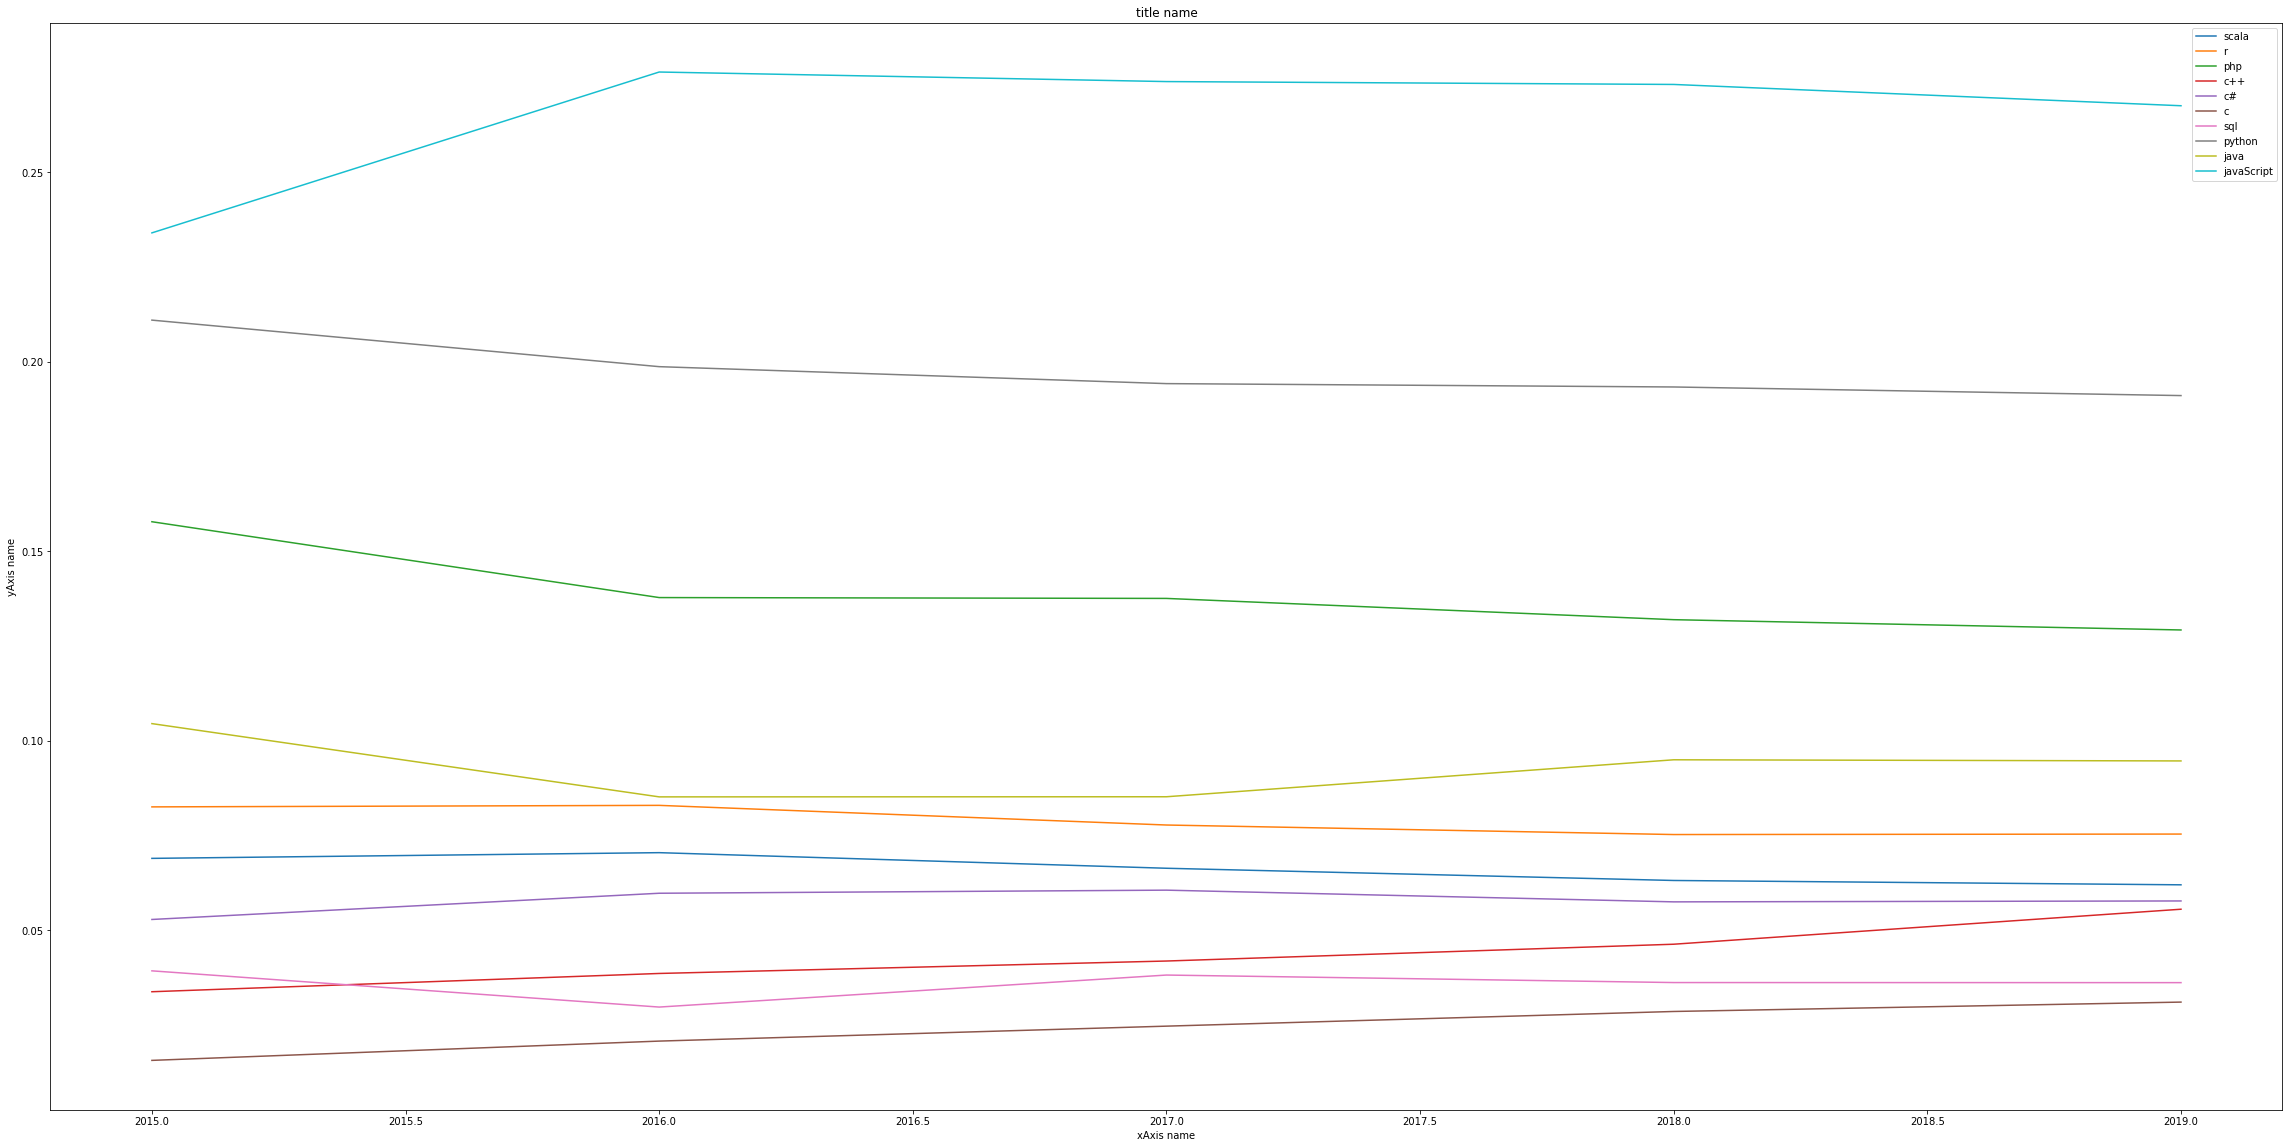

In [228]:
totalV=list(map(list, zip(*percentView)))

for i in range(10):
    plt.plot(years,totalV[i])
    print(totalV[i])

plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')

plt.legend(listLang)
plt.show()

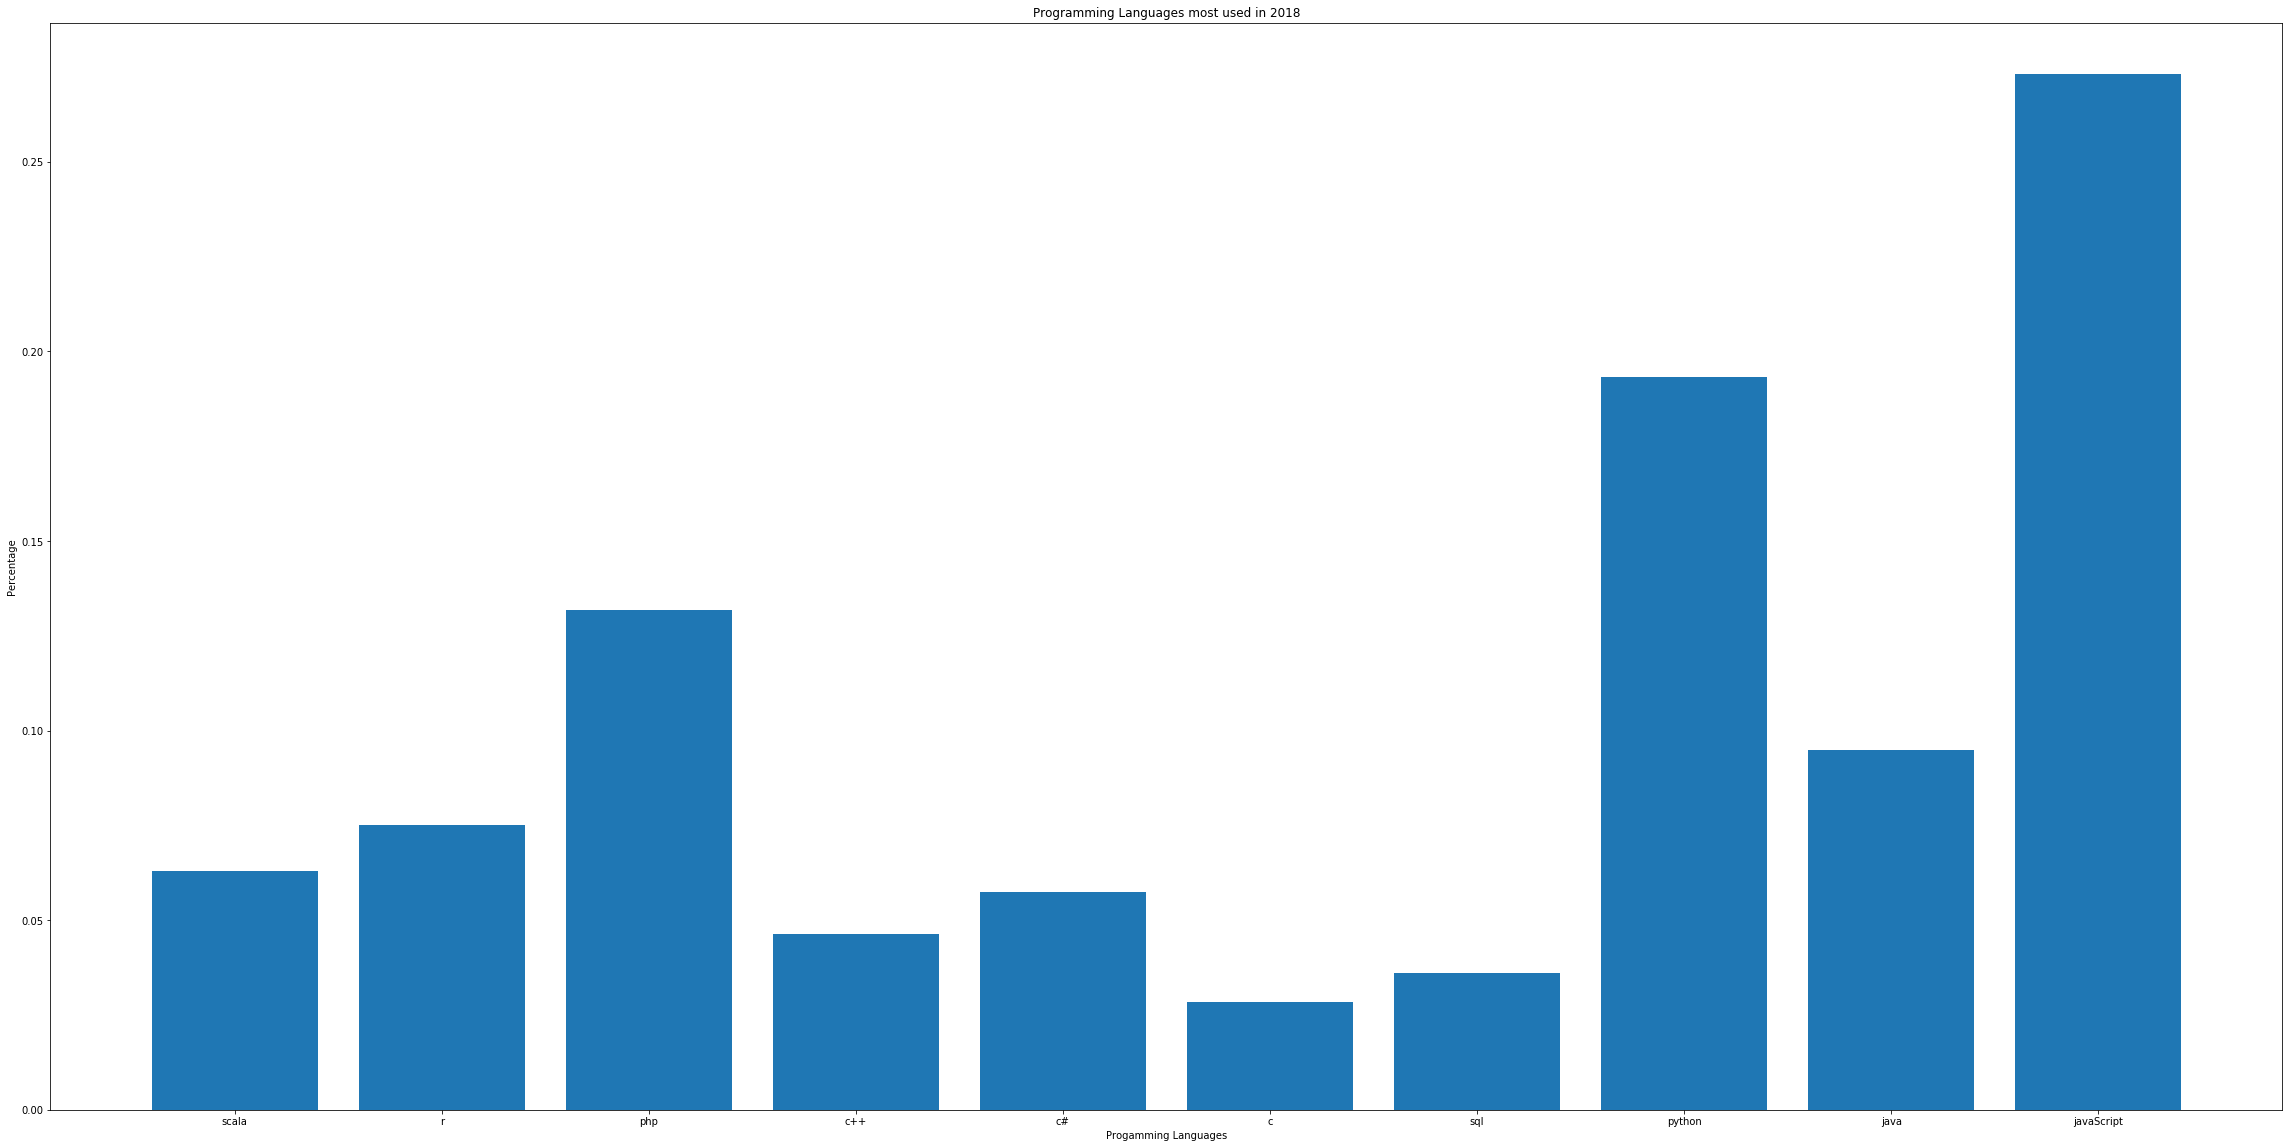

In [230]:
plt.title('Programming Languages most used in 2018')
plt.xlabel('Progamming Languages')
plt.ylabel('Percentage')
plt.bar(listLang,percentView[3])

plt.show()

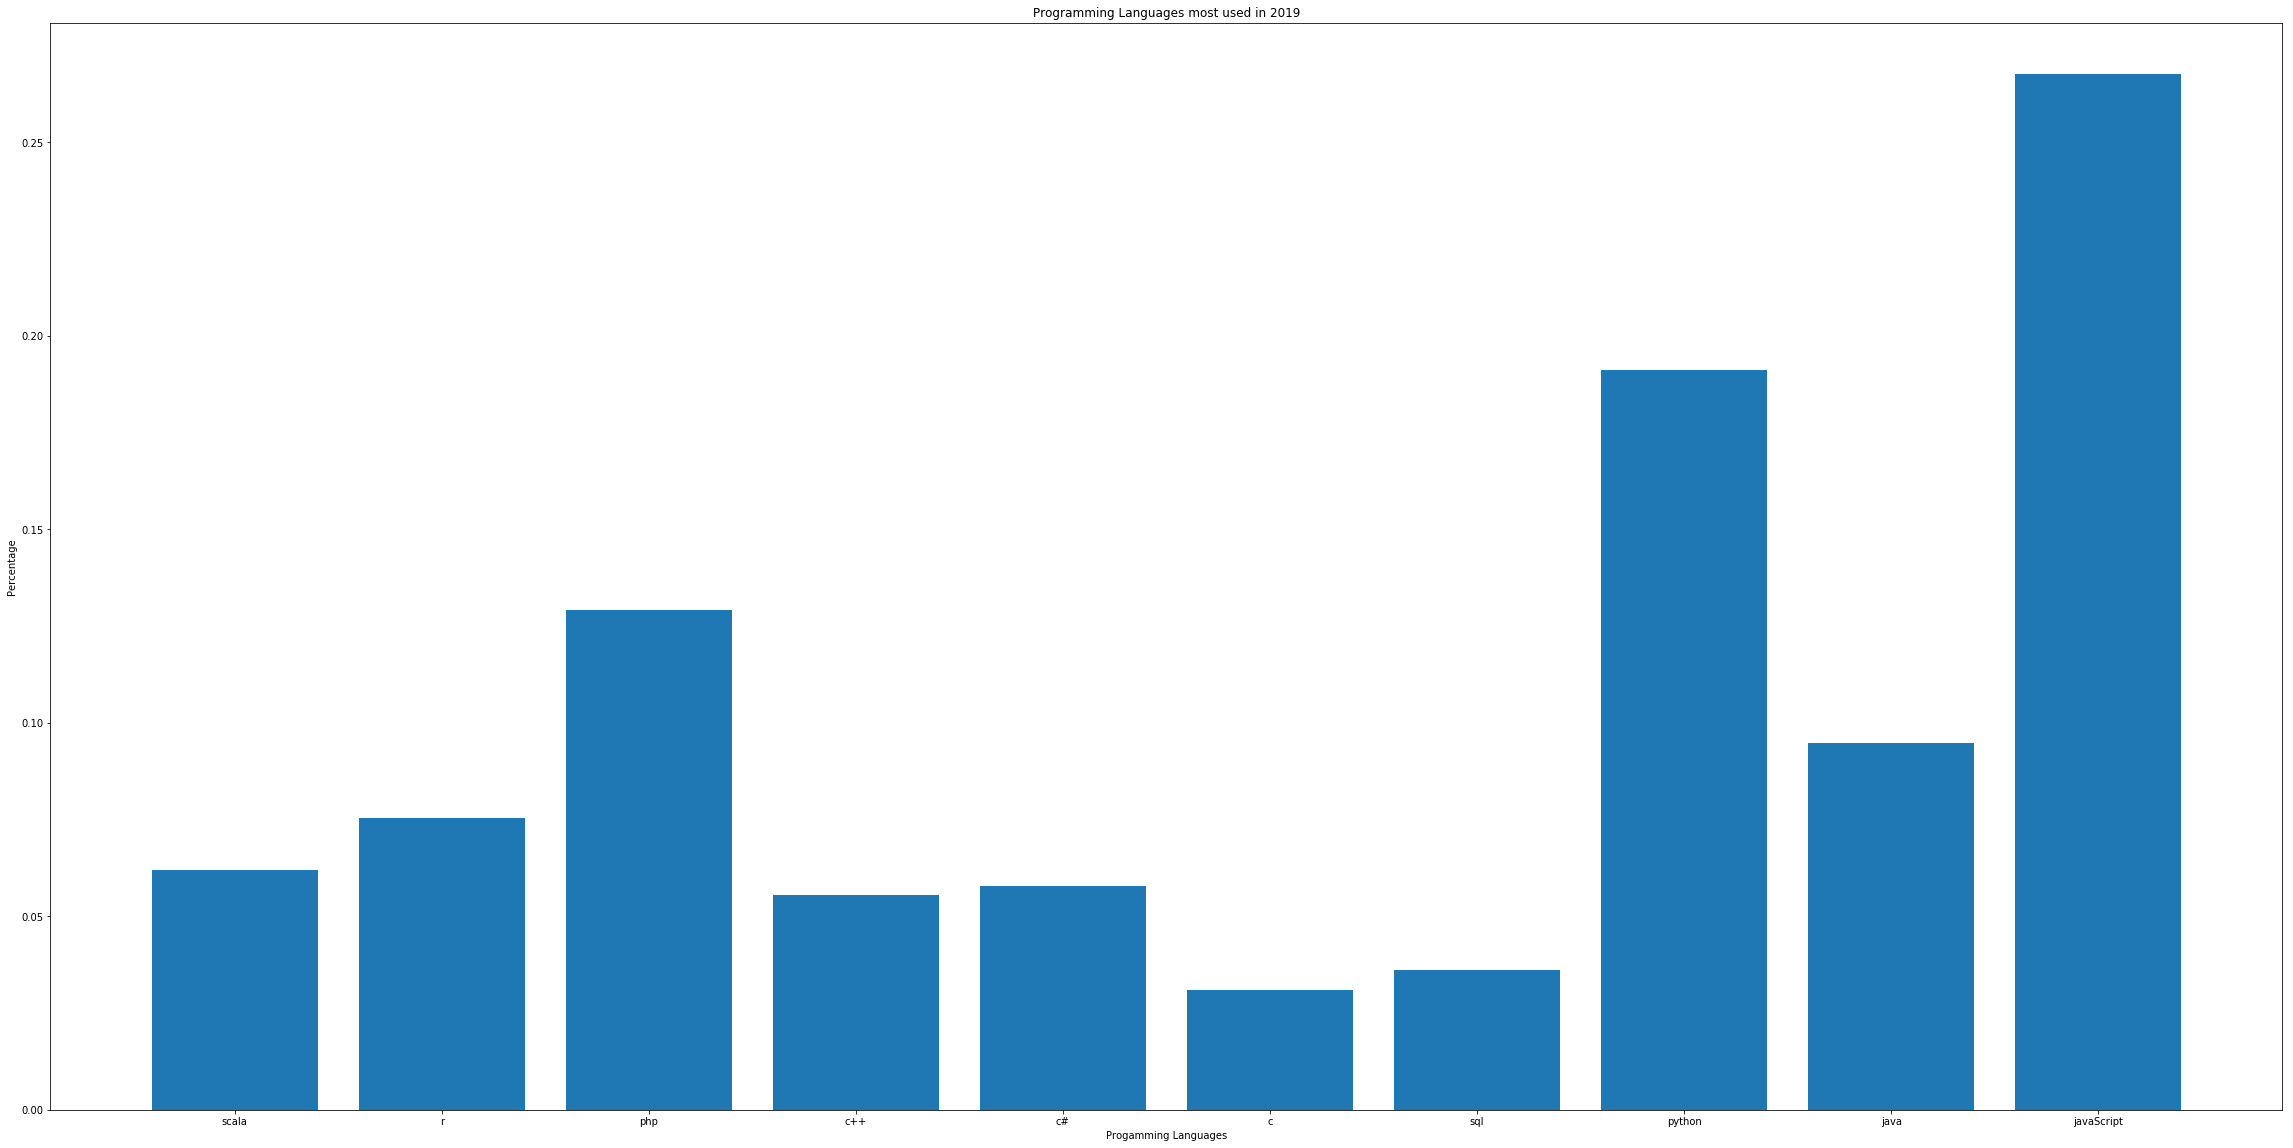

In [231]:
plt.title('Programming Languages most used in 2019')
plt.xlabel('Progamming Languages')
plt.ylabel('Percentage')
plt.bar(listLang,percentView[4])

plt.show()

In [ ]:
#https://www.reddit.com/r/programming/comments/bh78yd/most_popular_programming_languages_on_stack/

<BarContainer object of 7 artists>

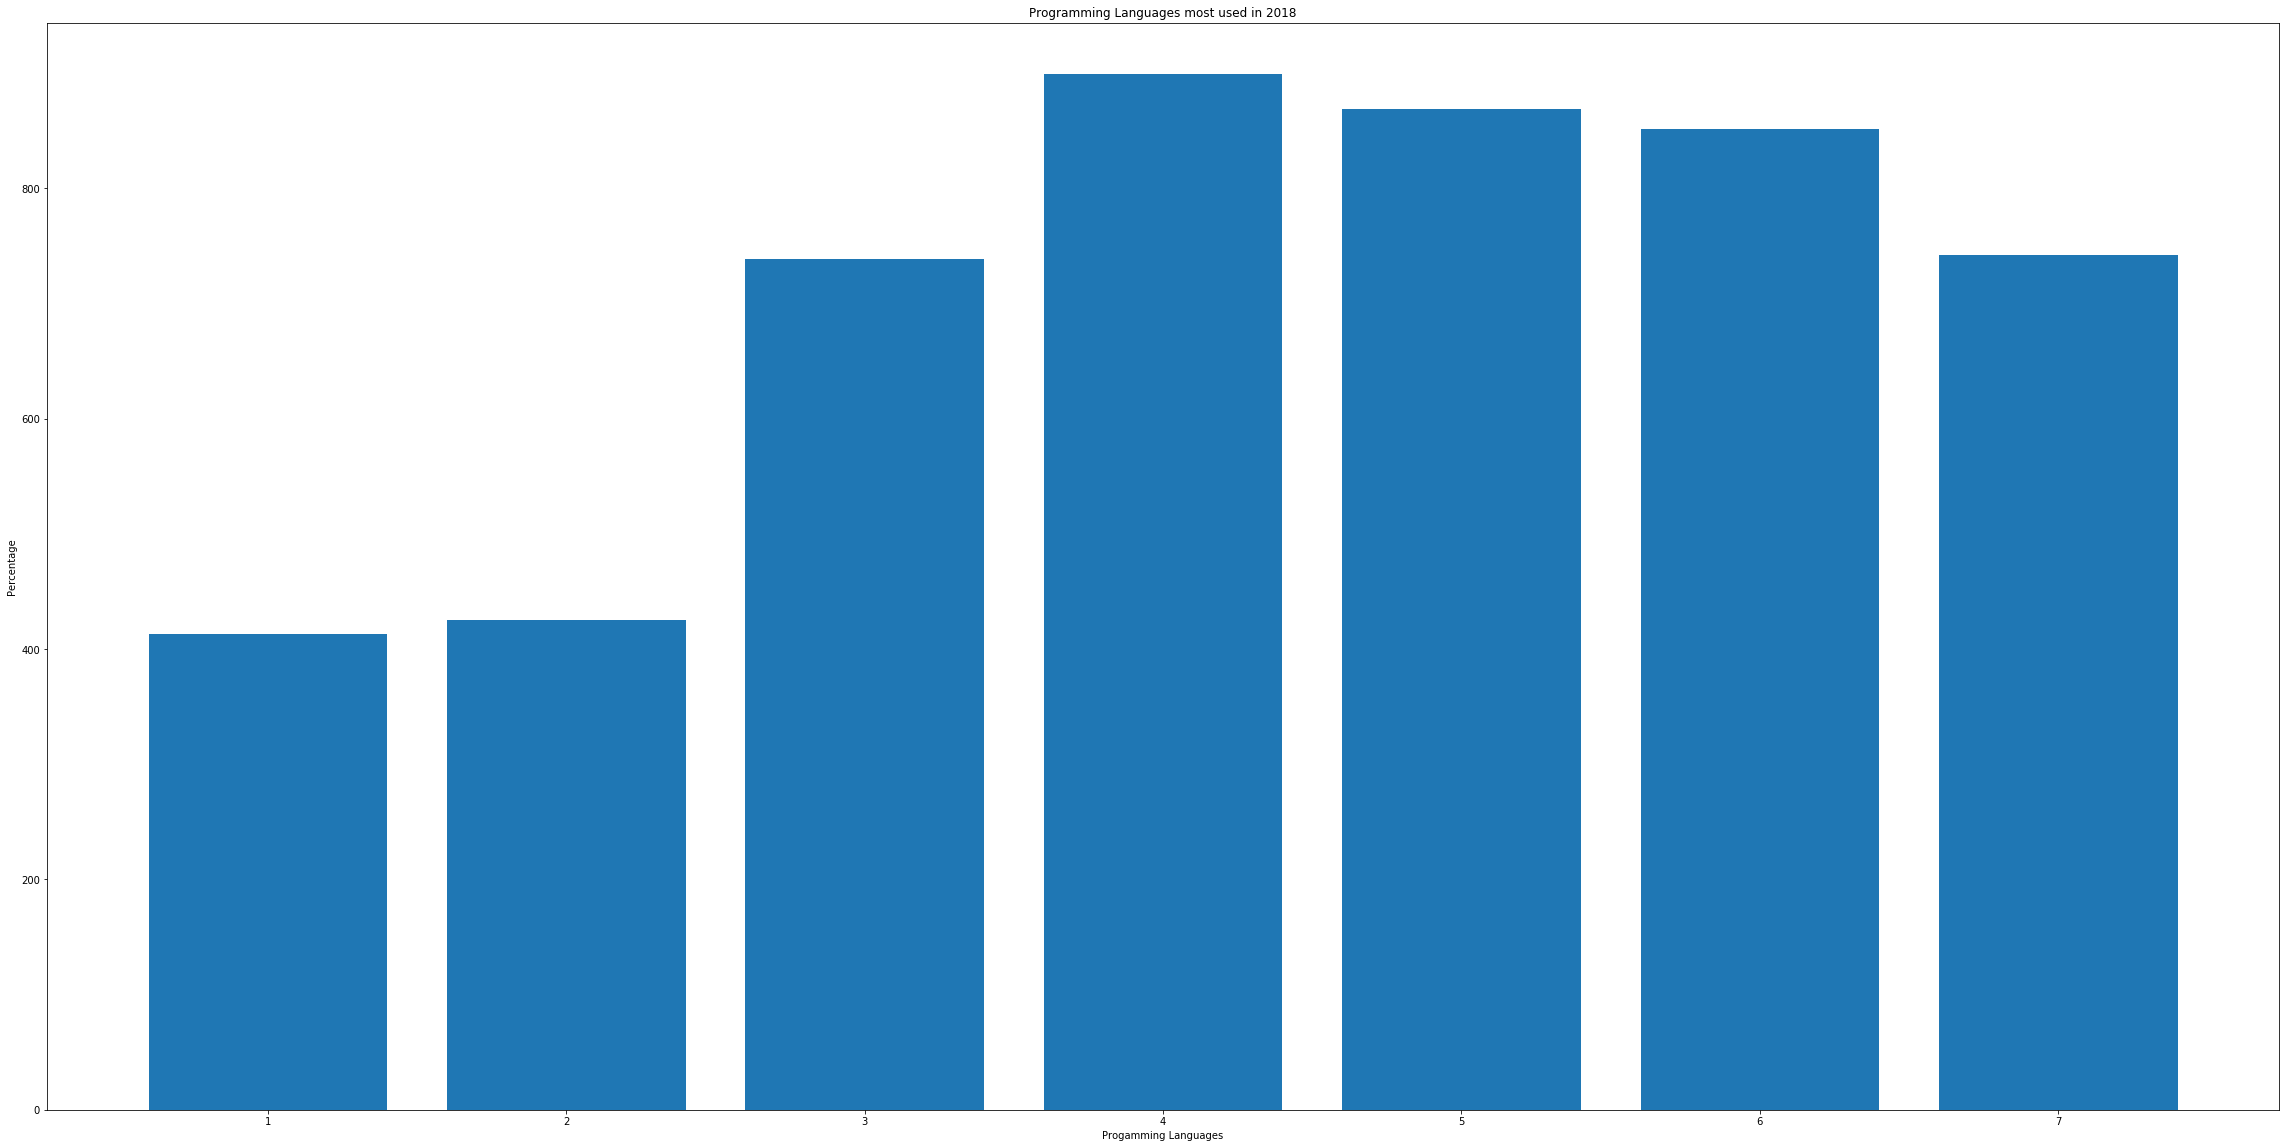

In [46]:
dates=['1','2','3','4','5','6','7']
plt.title('Programming Languages most used in 2018')
plt.xlabel('Progamming Languages')
plt.ylabel('Percentage')
plt.bar(dates,listNumbersJavaScr_V2[0])
